## TP Noté Examen Final : Sofiane KIHAL | Hager Ben Aissa

In [1117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### EXERCICE 1

#### 1 ) Faire l'inventaire du nombre de lignes et de colonnes du dataset

In [1118]:
train = pd.read_csv("data/measurements.csv")
shape = train.shape
print ("Lignes :", shape[0])
print("Colonnes :", shape[1])

Lignes : 388
Colonnes : 12


In [1119]:
train.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


2) Calculer la moyenne et l'ecart type des variables quantitative en fonction du type de carburant.

In [1120]:
train['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [1121]:
train.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

On observe qu'il y'a des variables quantitatives qui ont un format 'object' comme la consommation, on va donc les transformer en variable de type int64 (interpretable avec le float64 par le modèle)

In [1122]:
def comma_replace(df) :
    return df.replace(',','.')

train['temp_inside'] = train['temp_inside'].astype(str)
train['refill liters'] = train['refill liters'].astype(str)
    
train['distance'] = train['distance'].apply(comma_replace)
train['consume'] = train['consume'].apply(comma_replace)
train['temp_inside'] = train['temp_inside'].apply(comma_replace)
train['refill liters'] = train['refill liters'].apply(comma_replace)
train.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,nan,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,nan,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,nan,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,nan,NaN


In [1123]:
train['distance'] = train['distance'].astype(float)
train['consume'] = train['consume'].astype(float)
train['temp_inside'] = train['temp_inside'].astype(float)
train['refill liters'] = train['refill liters'].astype(float)

In [1124]:
train.groupby(by='gas_type').mean()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
gas_type,,,,,,,,,
E10,21.096250,4.931250,43.506250,21.917197,10.11875,0.043750,0.100000,0.075000,39.6000
SP98,18.639912,4.899123,40.820175,21.938356,12.22807,0.100877,0.140351,0.087719,35.5625


In [1125]:
train.groupby(by='gas_type').std()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
gas_type,,,,,,,,,
E10,20.307234,0.900956,14.077949,0.659854,6.392185,0.205181,0.300942,0.264218,3.056959
SP98,24.179598,1.118408,13.170122,1.201906,7.271373,0.301829,0.348115,0.283509,10.672787


#### 3) Y a-t-il une différence significative entre la consommation dans les deux types de carburant?

On remarque que la moyenne de consommation est de 4.93 pour le type de carburant E10 et de 4.89 pour le carburant SP98. C'est assez proche, et on remarque que l'écart type, c'est à dire la dispersion par rapport à la moyenne, est plutot faible car elle est de 0,9 à 1.1L par carburant. Sachant que la consommation ne dépend pas de la distance, on peut considérer qu'il n'y a pas de différence significative.

#### 5) Quelles sont les variables qui contiennent des valeurs manquantes et quelle est la proportion des valeurs manquants pour chacune de ces variables ?

In [1126]:
train.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

#### 6) Calculer ainsi la matrice X constituée des variables explicatives et la cible Y. Ensuite découper les observations en Xtrain, Ytrain, Xtest, Ytest, ou la premiere partie servira de base d'apprentissage et la seconde de base de test.

#### 7) Mettre en place un modèle d'apprentissage pour prédire la consommation.

#### 8) Tester plusieurs modèles et plusieurs combinaisons de paramètres afin de fournir le modèle avec la meilleure prédicition. On définira de façon claire et précise les méthodes d'évaluation de modèles mis en place.

Dans un premier temps nous allons nettoyer les données : c'est à dire combler les valeurs manquantes par la valeure médiane ou le mode selon que la variable est quantitative ou qualitative

In [1127]:
median = train.median()

In [1128]:
train.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object

In [1129]:
train['distance'].fillna(median['distance'], inplace=True)
train['consume'].fillna(median['consume'], inplace=True)
train['temp_inside'].fillna(median['temp_inside'], inplace=True)
train['refill liters'].fillna(median['refill liters'], inplace=True)

- La colonne 'refill gas' est identique à la colonne gas_type, on va donc faire une extraction caractéristique de la colonne gas_type pour l'ajouter au modèle comme paramètre.

- La colonne 'specials' a déjà été l'objet d'une extraction caractéristique, nous avons les colonnes AC, rain et sun qui nous donnent l'information voulue, inutile donc de s'en occuper.

In [1130]:
train.isnull().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters      0
refill gas       375
dtype: int64

Les données sont maintenant nettoyées.

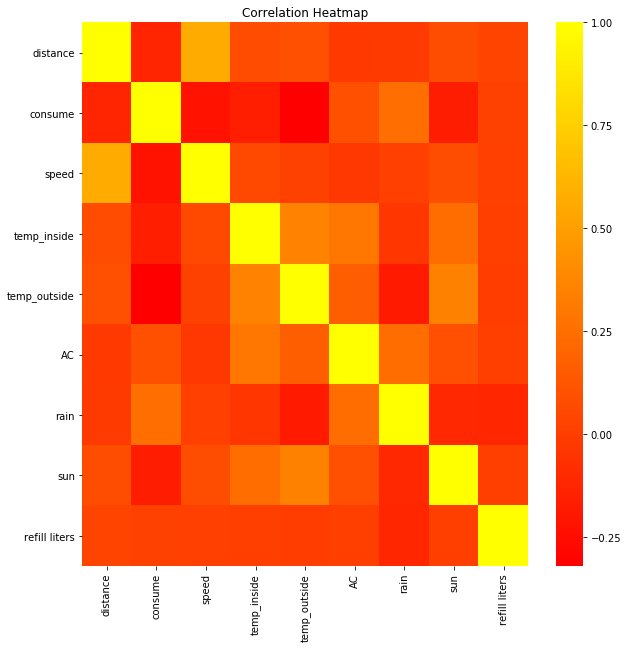

In [1131]:
import seaborn as sns

def correlation_heatmap(train) :
    plt.subplots(figsize=(10,10))
    ax = plt.axes()
    ax.set_title("Correlation Heatmap")
    corr = train.corr()
    return (sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,cmap='autumn'))

correlation_heatmap(train)


On remarque qu'il n'y a pas de forte corrélation apparente entre la consommation, on va essayer de faire une extraction caractéristique pour améliorer cela, puis plus tard on essaiera d'améliorer le modèle si cela ne suffit pas

In [1132]:
SP = train['gas_type'] == 'SP98'
E10 = train['gas_type'] == 'E10'
train['SP98'] = SP.astype(int)
train['E10'] = E10.astype(int)

In [1133]:
train.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,SP98,E10
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10,0,1
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,38.0,NaN,0,1
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,38.0,NaN,0,1
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,38.0,NaN,0,1
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,38.0,NaN,0,1


Ici, on a dummyfié les valeurs catégorielles de gas_type qui sont identiques à celles du gas_refill.

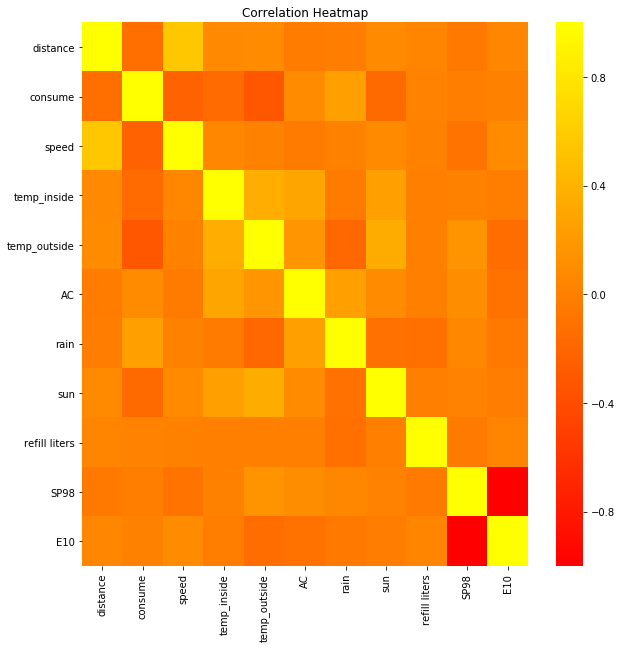

In [1134]:
correlation_heatmap(train)

L'amélioration est très nette, on remarque des correlations beaucoup plus fortes.

In [1135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [1136]:
keep = ['distance','speed', 'temp_inside','temp_outside','AC','rain','sun', 'SP98', 'E10']
from sklearn.metrics import mean_squared_error

In [1137]:
def parse_model(X,targetColumnsName, useColumns):
    if targetColumnsName not in X.columns:
        raise ValueError("target column survived should belong to df")
    target = X[targetColumnsName]
    X = X[useColumns]
    return X, target

In [1138]:
def RMSE(y_test,y_prediction):
        return np.sqrt(((y_prediction - y_test) ** 2).mean())

In [1139]:
def modelisationProcessing(modelAlgo,dfData,features,targetName):
    X, y = parse_model(dfData.copy(),targetName, features)
    list_test_size = [a/20.0 for a in list(range(0,20,1))][1:]
    scores = []
    for ts in list_test_size:
        X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
        modelAlgoFitted = modelAlgo.fit(X_train,y_train)
        scores.append(modelAlgoFitted.score(X_test,y_test))
        
    # calcul du RMSE
    y_pred = modelAlgoFitted.predict(X_test)
    rmse = RMSE(y_test,y_pred)
    return np.array(scores).mean(),rmse

On implémente 3 fonctions qui vont nous permettre de construire des modèles différents et de calculer leur erreur quadratique moyenne.

In [1140]:
from sklearn.linear_model import LinearRegression

In [1141]:
lr= LinearRegression()
resultat2,rmse2= modelisationProcessing(lr,train,keep,target)
print("Resultat score : {} RMSE: {}".format(resultat2, rmse2))

Resultat score : 0.1308489414112719 RMSE: 1.2248836155849017


Le resultat de la regression linéaire est très mauvais comme on peut le constater, essayons le Random Forest Regressor.

In [1142]:
rf = RandomForestRegressor(n_estimators = 150, min_samples_leaf = 8, max_depth = 50)
target = 'consume'
resultat,rmse = modelisationProcessing(rf,train,keep,target)

print("Resultat score : {} RMSE: {}".format(resultat, rmse))

Resultat score : 0.5519733960519149 RMSE: 0.8802323792436896


On constate que même si les resultats ne sont pas très bons, ils restent largement supérieur à ceux obtenus avec la regression linéaire.


In [1143]:
train[keep].head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun,SP98,E10
0,28.0,26,21.5,12,0,0,0,0,1
1,12.0,30,21.5,13,0,0,0,0,1
2,11.2,38,21.5,15,0,0,0,0,1
3,12.9,36,21.5,14,0,0,0,0,1
4,18.5,46,21.5,15,0,0,0,0,1


### EXERCICE 2

In [1144]:
train2 = pd.read_csv("data/banc3-20V243.csv",sep=";")
train2.shape

(8259, 12)

In [1145]:
train2.head()

,Timestamp,Serial_Number,Spectrum_H29_2R,Spectrum_H29_2T,Spectrum_H56_2R,Spectrum_H56_2T,Spectrum_H57_2R,Spectrum_H57_2T,Spectrum_H58_2R,Spectrum_H58_2T,result_H29_2R,result_H29_2T
0,02/03/2018 11:16,664,"0,005684887","0,003582062","0,006776467","0,006435905","0,007683833","0,008451626","0,004948708","0,006481649","0,01","0,005"
1,02/03/2018 11:17,664,"0,00529535","0,004932173","0,006106189","0,009485114","0,003434228","0,007939726","0,008026021","0,011386434","0,01","0,005"
2,02/03/2018 11:18,664,"0,003440362","0,002912695","0,006622684","0,009302711","0,010210842","0,011266201","0,007961285","0,004485782","0,01","0,005"
3,05/03/2018 07:42,11955,"0,007455071","0,004046415","0,005582244","0,011148532","0,005209666","0,006265591","0,006771616","0,008961829","0,01","0,005"
4,05/03/2018 07:43,11955,"0,007982813","0,00236683","0,008592006","0,00705735","0,006530786","0,008893737","0,006261098","0,007048056","0,01","0,005"


#### 1. L'objectif est de calculer la cible (boite à forte vibration ou non)

- Pour les spectres Spectrum H292R et Spectrum H292T, calculer la variable cible (vibration vs non vibration) pour chaque boite et chaque ordre (T et R). On considèrera qu'une boite est à forte vibration si la moyenne de son spectre est supérieure à sa valeur limite.

In [1146]:
train2.isnull().sum()

Timestamp          0
Serial_Number      0
Spectrum_H29_2R    0
Spectrum_H29_2T    0
Spectrum_H56_2R    0
Spectrum_H56_2T    0
Spectrum_H57_2R    0
Spectrum_H57_2T    0
Spectrum_H58_2R    0
Spectrum_H58_2T    0
result_H29_2R      0
result_H29_2T      0
dtype: int64

In [1147]:
for column in train2:
    
    if column != 'Timestamp' and column != 'Serial_Number':
        train2[column] = pd.to_numeric(train2[column].str.replace(',','.'))

train2.head()

,Timestamp,Serial_Number,Spectrum_H29_2R,Spectrum_H29_2T,Spectrum_H56_2R,Spectrum_H56_2T,Spectrum_H57_2R,Spectrum_H57_2T,Spectrum_H58_2R,Spectrum_H58_2T,result_H29_2R,result_H29_2T
0,02/03/2018 11:16,664,0.005685,0.003582,0.006776,0.006436,0.007684,0.008452,0.004949,0.006482,0.01,0.005
1,02/03/2018 11:17,664,0.005295,0.004932,0.006106,0.009485,0.003434,0.007940,0.008026,0.011386,0.01,0.005
2,02/03/2018 11:18,664,0.003440,0.002913,0.006623,0.009303,0.010211,0.011266,0.007961,0.004486,0.01,0.005
3,05/03/2018 07:42,11955,0.007455,0.004046,0.005582,0.011149,0.005210,0.006266,0.006772,0.008962,0.01,0.005
4,05/03/2018 07:43,11955,0.007983,0.002367,0.008592,0.007057,0.006531,0.008894,0.006261,0.007048,0.01,0.005


In [1148]:
dataset = train2[['Serial_Number','Spectrum_H29_2R','Spectrum_H29_2T','result_H29_2R','result_H29_2T']]
dataset = dataset.groupby(by='Serial_Number',as_index=False).mean()
dataset.head()

,Serial_Number,Spectrum_H29_2R,Spectrum_H29_2T,result_H29_2R,result_H29_2T
0,0,0.004507,0.012133,0.008,0.0046
1,100425,0.032368,0.004689,0.005,0.0040
2,100431,0.004437,0.002663,0.005,0.0040
3,100432,0.002748,0.003694,0.005,0.0040
4,100436,0.006130,0.004625,0.005,0.0040


In [1149]:
dataset['vibration_H29_2R'] = dataset['Spectrum_H29_2R'] > dataset['result_H29_2R']
dataset['vibration_H29_2R'] = dataset['vibration_H29_2R'].astype(int)

dataset['vibration_H29_2T'] = dataset['Spectrum_H29_2T'] > dataset['result_H29_2T']
dataset['vibration_H29_2T'] = dataset['vibration_H29_2T'].astype(int)

dataset.head()

,Serial_Number,Spectrum_H29_2R,Spectrum_H29_2T,result_H29_2R,result_H29_2T,vibration_H29_2R,vibration_H29_2T
0,0,0.004507,0.012133,0.008,0.0046,0,1
1,100425,0.032368,0.004689,0.005,0.0040,1,1
2,100431,0.004437,0.002663,0.005,0.0040,0,0
3,100432,0.002748,0.003694,0.005,0.0040,0,0
4,100436,0.006130,0.004625,0.005,0.0040,1,1


Nous avons crée un nouveau DataFrame appelé dataset dans lequel on a deux colonnes 'vibration' qui indiquent si la boite est à forte vibration ou non (1 si oui, 0 sinon). 

Ainsi, si une boite possède au moins un 1, elle sera considéré comme vibrante, sinon non.

#### 2. Modéliser alors la vibration en fonction des spectres aux autres fréquences H56, H57, H58

In [1150]:
dataset2 = train2
dataset2 = dataset2.groupby(by='Serial_Number',as_index=False).mean()
dataset2.head()

,Serial_Number,Spectrum_H29_2R,Spectrum_H29_2T,Spectrum_H56_2R,Spectrum_H56_2T,Spectrum_H57_2R,Spectrum_H57_2T,Spectrum_H58_2R,Spectrum_H58_2T,result_H29_2R,result_H29_2T
0,0,0.004507,0.012133,0.005866,0.007643,0.004328,0.006183,0.006021,0.009096,0.008,0.0046
1,100425,0.032368,0.004689,0.006624,0.008089,0.006833,0.010154,0.019036,0.007979,0.005,0.0040
2,100431,0.004437,0.002663,0.007735,0.004784,0.008976,0.007945,0.007421,0.007603,0.005,0.0040
3,100432,0.002748,0.003694,0.009721,0.006882,0.006768,0.010773,0.007170,0.004751,0.005,0.0040
4,100436,0.006130,0.004625,0.002385,0.009154,0.004067,0.008310,0.005358,0.008884,0.005,0.0040


In [1151]:
dataset2['vibration_H29_2R'] = dataset2['Spectrum_H29_2R'] > dataset2['result_H29_2R']
dataset2['vibration_H29_2R'] = dataset2['vibration_H29_2R'].astype(int)

dataset2['vibration_H29_2T'] = dataset2['Spectrum_H29_2T'] > dataset2['result_H29_2T']
dataset2['vibration_H29_2T'] = dataset2['vibration_H29_2T'].astype(int)

dataset2.head()

,Serial_Number,Spectrum_H29_2R,Spectrum_H29_2T,Spectrum_H56_2R,Spectrum_H56_2T,Spectrum_H57_2R,Spectrum_H57_2T,Spectrum_H58_2R,Spectrum_H58_2T,result_H29_2R,result_H29_2T,vibration_H29_2R,vibration_H29_2T
0,0,0.004507,0.012133,0.005866,0.007643,0.004328,0.006183,0.006021,0.009096,0.008,0.0046,0,1
1,100425,0.032368,0.004689,0.006624,0.008089,0.006833,0.010154,0.019036,0.007979,0.005,0.0040,1,1
2,100431,0.004437,0.002663,0.007735,0.004784,0.008976,0.007945,0.007421,0.007603,0.005,0.0040,0,0
3,100432,0.002748,0.003694,0.009721,0.006882,0.006768,0.010773,0.007170,0.004751,0.005,0.0040,0,0
4,100436,0.006130,0.004625,0.002385,0.009154,0.004067,0.008310,0.005358,0.008884,0.005,0.0040,1,1
